# P02_Modeling

# Recap for Categorical features

* x3 is nominal categorical feature (needs OneHotEncoder transformer) and custom function edit is needed
* x7 column: the % sign should be cleaned from strings and I need to change the dtype and introduce it as numeric feature.
* x19 column: the % sign should be cleaned from strings and I need to change the dtype and introduce it as numeric feature.
* x24 column: is nominal category and needs to be transformed using One Hot Encoding
* x31 column: is nominal category and needs to be transformed using One Hot Encoding
* x33 column: is nominal category and needs to be transformed using One Hot Encoding
* x39 should be droped the column 
* x60 is nominal and OneHotEncoder should be used to transfer this column
* x65 is nominal and OneHotEncoder should be used to transfer this column
* x77 is nominal and OneHotEncoder should be used to transfer this column
* x93 is nominal and OneHotEncoder should be used to transfer this column
* X99 should be droped - it has just one category. 
* The x24, x33, and x77 columns NaN values needs to be replaced by their mode.


# Recap for Numerical features


- Column 'x30', 'x44', 'x57' have more than 50% nan and should be droped
- Three features inside the numeric df need to be transformed using One Hot Encoding. These are features with 0-1 values and should be treated like category features. These are 0-1 features and should be treated like category features. columns are x59 and x79 and x98
- I may use Isolation Forest or LOF for outlier detection. I will check the AUC to see the differences.
- High score numerical features are as follow:
```['x16', 'x18', 'x28', 'x32', 'x35', 'x40', 'x47', 'x52', 'x57', 'x62', 'x68', 'x70', 'x75', 'x78', 'x81', 'x88', 'x89', 'x95', 'x96']```
- With n_components=12, I get 0.62 AUC and as it is seen 12 principal components have 62٪ of variance. I may apply PCA if I found not using it computationally time expensive.


## import libraries

In [1]:
import pandas as pd
import numpy as np
import regex as re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle

import matplotlib.pyplot as plt
import re

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

In [3]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold

In [5]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [7]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import FunctionTransformer


In [8]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot


In [10]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [11]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
%config InlineBackend.figure_format = 'retina'

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Read data set

In [15]:
file_path = "../DataSet/"
file_name = "exercise_40_train.csv"
df = pd.read_csv(file_path+file_name)

In [16]:
df.shape

(40000, 101)

In [17]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


In [18]:
df_numeric_features = df.drop(['y'],axis=1)

In [19]:
df.dtypes.value_counts()

float64    86
object     12
int64       3
dtype: int64

In [20]:
df_numeric_features = df.select_dtypes(include=['float64', 'int64'])
df_numeric_features = df_numeric_features.drop(['y'],axis=1)

In [21]:
df_cat_features = df.select_dtypes(include=['object'])
df_cat_features.head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes


# Make custom transformation for categorical features

## X3:

```x3 is nominal categorical feature (needs OneHotEncoder transformer) and custom function edit is needed```

Making a custom eddit transformation for x3 column as follow.

In [22]:
def custom_edit_x3(df_categ):
    
    # https://stackoverflow.com/questions/60237488/python-replace-only-exact-word-in-string
    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bTue\b', 'Tuesday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bSun\b', 'Sunday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bSat\b', 'Saturday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bFri\b', 'Friday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bWed\b', 'Wednesday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bMon\b', 'Monday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bThur\b', 'Thursday', string)
    return df_categ
    
    return df_categ

make a column transformer fucntion and make sure it works

In [23]:
custom_edit_x3_tf = FunctionTransformer(custom_edit_x3)
ct = make_column_transformer((custom_edit_x3_tf, ['x3']))

In [24]:
ct.fit_transform(df)

array([['Wednesday'],
       ['Friday'],
       ['Thursday'],
       ...,
       ['Monday'],
       ['Tuesday'],
       ['Thursday']], dtype=object)

as it is seen the new column transformer works just fine. I need to perform two tasks on this column therefore I make a pipeline and then I make a new column transformer out of it.
Note that introducing two separate functions into the column transformer generates two new features out of one input column. This is due to the fact that the function transformer work in parallel on one input.

I want my custom transformer function to first edit the column and does OneHotEncoding.

In [42]:
x3_pipe = make_pipeline(custom_edit_x3_tf, SimpleImputer(strategy="most_frequent"), OneHotEncoder())
ct = make_column_transformer((x3_pipe, ['x3']))
ct.fit_transform(df).toarray()[0].size

7

Nice! now I have a customized transformer for a specific x3 feature! 
let's practice the same procedure based on recaps we had for categorical features - the P01 part of this study.

# X7:

```x7 column: the % sign should be cleaned from strings and I need to change the dtype and introduce it as numeric feature.```

I just filter it out the % sign using custom tf.

make a column transformer fucntion and make sure it works/

In [26]:
# from tqdm import tqdm
    
# def custom_edit_x7(df_categ):
#     for i, string in (enumerate(tqdm(df_categ['x7'].values))):
# #         print(i)
#         df_categ['x7'].values[i] = df['x7'].str.replace('%','')
# #     df['x7'] = df['x7'].str.replace('%','')
    
# custom_edit_x7_tf = FunctionTransformer(custom_edit_x7)
# ct = make_column_transformer((custom_edit_x7_tf, ['x7']))
# ct.fit_transform(df)

In [27]:
def custom_edit_x7(df):
    df = df.apply(lambda x: (x.str.replace('%','')))

    return (np.float_(df))

custom_edit_x7_tf = FunctionTransformer(custom_edit_x7)
ct = make_column_transformer((custom_edit_x7_tf, ['x7']))
x7 = ct.fit_transform(df)

<AxesSubplot:ylabel='Frequency'>

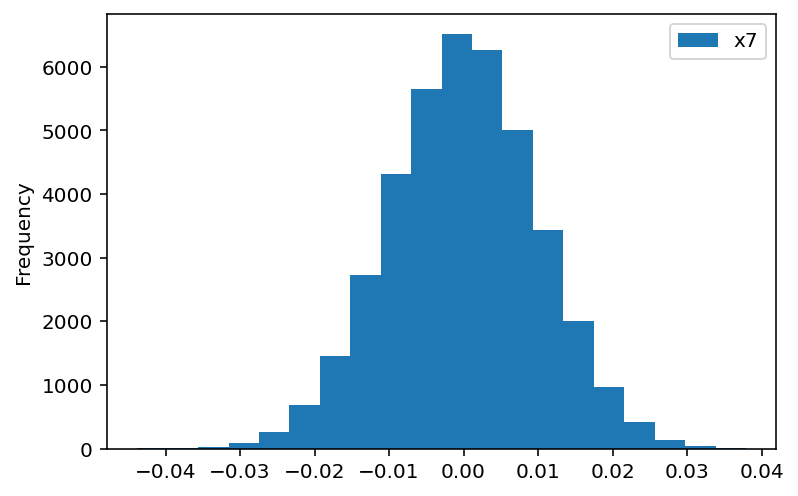

In [28]:
x7_pd = pd.DataFrame(x7, columns=['x7'])
x7_pd.plot(kind='hist', bins=20)

I like the x7 distribution. so no need for any other transformation.

In [29]:
x7_pd.isnull().sum()

x7    0
dtype: int64

no null value.

X7 is numerical!I will take care of it in numerical section.

In [30]:
# x7_pipe = make_pipeline(custom_edit_x7_tf, SimpleImputer(strategy="most_frequent"), OneHotEncoder())
# ct = make_column_transformer((x7_pipe, ['x7']))
# ct.fit_transform(df).toarray()[0]

# x19

```x19 column: the % sign should be cleaned from strings and I need to change the dtype and introduce it as numeric feature.```

In [31]:
df['x19'].head(2)

0    $-908.650758424405
1     $-1864.9622875143
Name: x19, dtype: object

In [32]:
def custom_edit_x19(df):
    df = df.apply(lambda x: (x.str.replace('$','')))

    return (np.float_(df))

custom_edit_x19_tf = FunctionTransformer(custom_edit_x19)
ct = make_column_transformer((custom_edit_x19_tf, ['x19']))
x19 = ct.fit_transform(df)

<AxesSubplot:ylabel='Frequency'>

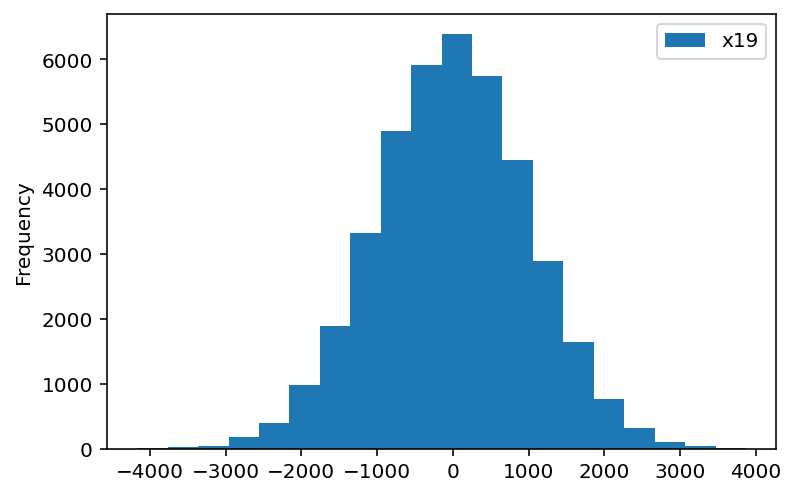

In [33]:
x19_pd = pd.DataFrame(x19, columns=['x19'])
x19_pd.plot(kind='hist', bins=20)

good.

In [34]:
x19_pd.isnull().sum()

x19    0
dtype: int64

X19 is numerical!I will take care of it in numerical section.

In [43]:
# x19_pipe = make_pipeline(custom_edit_x19_tf, SimpleImputer(strategy="most_frequent"), OneHotEncoder())
# ct = make_column_transformer((x19_pipe, ['x19']))
# ct.fit_transform(df).toarray()[0]

```
x24 column: is nominal category and needs to be transformed using One Hot Encoding
x31 column: is nominal category and needs to be transformed using One Hot Encoding
x33 column: is nominal category and needs to be transformed using One Hot Encoding
x60 is nominal and OneHotEncoder should be used to transfer this column
x65 is nominal and OneHotEncoder should be used to transfer this column
x77 is nominal and OneHotEncoder should be used to transfer this column
x93 is nominal and OneHotEncoder should be used to transfer this column
```

In [36]:
for col in ['x24','x31','x33','x60','x65','x77','x93']:
    print(df[col].dtypes)
    print(df[col].unique(),'\n')

object
['female' 'male' nan] 

object
['no' 'yes'] 

object
['Colorado' 'Tennessee' 'Texas' 'Minnesota' 'New York' 'Florida'
 'Nebraska' 'California' nan 'North Dakota' 'Arizona' 'Alabama' 'Ohio'
 'Pennsylvania' 'Iowa' 'Indiana' 'Vermont' 'Arkansas' 'Massachusetts'
 'Illinois' 'Georgia' 'West Virginia' 'Connecticut' 'Virginia'
 'North Carolina' 'Montana' 'New Mexico' 'New Hampshire' 'Michigan' 'DC'
 'Washington' 'Louisiana' 'Kentucky' 'Utah' 'Missouri' 'Oregon' 'Oklahoma'
 'Nevada' 'Wisconsin' 'New Jersey' 'Maryland' 'Maine' 'Alaska' 'Idaho'
 'Wyoming' 'Rhode Island' 'South Dakota' 'Mississippi' 'Kansas' 'Delaware'
 'Hawaii' 'South Carolina'] 

object
['August' 'April' 'September' 'January' 'December' 'March' 'July'
 'November' 'June' 'February' 'October' 'May'] 

object
['farmers' 'allstate' 'geico' 'progressive' 'esurance'] 

object
['mercedes' 'subaru' 'nissan' 'toyota' nan 'chevrolet' 'buick' 'ford'] 

object
['no' 'yes'] 



let's make sure about NaNs in above categorical columns

In [37]:
two_step_transformer_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                                     OneHotEncoder())

In [46]:
two_step_transformer_pipe.fit_transform(df[['x24','x31','x33','x60','x65','x77','x93']]).toarray()[0].size

81

In [44]:
ct = make_column_transformer((x3_pipe, ['x3']),
                             (two_step_transformer_pipe, ['x24','x31','x33','x60','x65','x77','x93']),
                            )

In [47]:
ct.fit_transform(df).toarray()[0].size

88

nice!

remeber that I have two columns x7,x19 which have to be consider in numerical section.

In [ ]:
# fix_x3_col(df_cat_features)

customize transformer

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class ExperimentalTransformer_2(BaseEstimator, TransformerMixin):
    # add another additional parameter, just for fun, while we are at it
    def __init__(self, feature_name, additional_param = "Himanshu"):  
        print('\n>>>>>>>init() called.\n')
        self.feature_name = feature_name
        self.additional_param = additional_param

    def fit(self, X, y = None):
        print('\n>>>>>>>fit() called.\n')
#         print(f'\nadditional param ~~~~~ {self.additional_param}\n')
        return self

    def transform(self, X, y = None):
        print('\n>>>>>>>transform() called.\n')
        X_ = X.copy() # creating a copy to avoid changes to original dataset
#         X_[self.feature_name] = 2 * np.sqrt(X_[self.feature_name])
        
#         df_categ['x3'].values[i] = re.sub(r'\bTue\b', 'Tuesday', string)
        X_[self.feature_name] = re.sub(r'\bTue\b', 'Tuesday', str(X_(self.feature_name)))
        
        
        return X_
    
    def fit_transform(self, X, y = None):
        print('\n>>>>>>>fit_transform() called.\n')
        X_ = X.copy() # creating a copy to avoid changes to original dataset
#         X_[self.feature_name] = 2 * np.sqrt(X_[self.feature_name])
        
#         df_categ['x3'].values[i] = re.sub(r'\bTue\b', 'Tuesday', string)
        X_[self.feature_name].values[i] = re.sub(r'\bTue\b', 'Tuesday', 
                                                 (X_(self.feature_name)))
        
        
        return X_

In [ ]:
et = ExperimentalTransformer_2(feature_name='x3')
et.fit_transform(df_cat_features, df['y'])


In [ ]:
# print("create pipeline 2")
pipe2 = Pipeline(steps=[('experimental_trans', ExperimentalTransformer_2('X3'))])
# print("fit pipeline 2")
pipe2.fit_transform(df_cat_features, df['y'])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(columns=['X1', 'X2', 'y'], data=[[1,16,9],
                                                   [4,36,16],
                                                   [1,16,9],
                                                   [2,9,8],
                                                   [3,36,15],
                                                   [2,49,16],
                                                   [4,25,14],
                                                   [5,36,17]
])

### y = X1 + 2 * sqrt(X2)

train = df.iloc[:6]
test = df.iloc[6:]

train_X = train.drop('y', axis=1)
train_y = train.y

test_X = test.drop('y', axis=1)
test_y = test.y


class ExperimentalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('\n>>>>>>>init() called.\n')

    def fit(self, X, y = None):
        print('\n>>>>>>>fit() called.\n')
        return self

    def transform(self, X, y = None):
        print('\n>>>>>>>transform() called.\n')
        X_ = X.copy() # creating a copy to avoid changes to original dataset
        X_.X2 = 2 * np.sqrt(X_.X2)
        return X_
    
# without input transformation - to validate that we get the same results as before
print("create pipeline 1")
pipe1 = Pipeline(steps=[
                       ('linear_model', LinearRegression())
])
print("fit pipeline 1")
pipe1.fit(train_X, train_y)
print("predict via pipeline 1")
preds1 = pipe1.predict(test_X)
print(f"\n{preds1}")  # should be [13.72113586 16.93334467]
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds1))}\n")  

In [ ]:
pipe2.transform(df_cat_features, df['y'])

In [ ]:
ExperimentalTransformer_2.fit_transform(df_cat_features['x3'])

In [ ]:
df_cat_features.head()

In [ ]:
X = df[['x3', 'x24', 'x31', 'x33', 
        'x60', 'x65', 'x77', 'x93']]

y = df['y']

x_3_trans_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                               OneHotEncoder())

col_transform  = make_column_transformer((x_3_trans_pipe, ['x3', 'x24', 'x31','x33', 
                                                           'x60', 'x65','x77', 'x93']))

In [ ]:
# https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer/54160620

numeric_features = df_numeric_features.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = X_catg.columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs',
                                                        weights=weights))]) 

In [ ]:
# load the dataset
X = X_all_features
y = df['y']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
clf.fit(X_train,y_train)